# Polynominal Regression Model for two variables (Y, X)

Mean Squared Error: 2.5977551086492306e-05
R-squared: 0.9999999679442253
Intercept (a): -0.0028847330168630947
Coefficients (b): [ 0.00000000e+00 -3.82853170e-02  9.99718603e-01  1.46162037e-05]


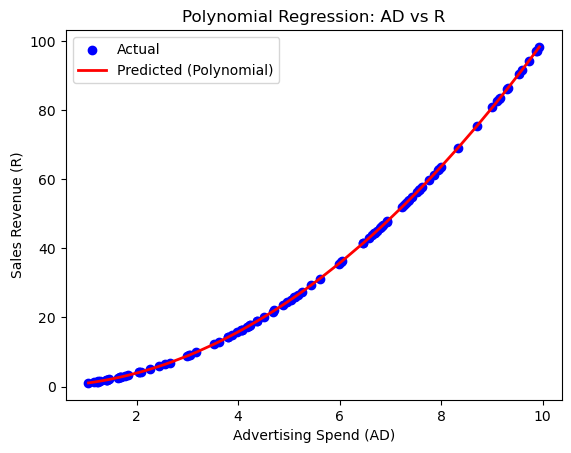

In [4]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
data = pd.read_excel("data3.xlsx")

# Define the independent (X) and dependent (Y) variables
X = data[['AD']]  # Advertising spend as the independent variable
Y = data['R']     # Sales revenue as the dependent variable

# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Create polynomial features (degree=2 for quadratic)
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model on the polynomial features of the training data
model.fit(X_train_poly, Y_train)

# Predict the sales revenue using the polynomial features of the test data
Y_pred = model.predict(X_test_poly)

# Model evaluation
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Get the intercept and coefficients
intercept = model.intercept_
coefficients = model.coef_

print("Intercept (a):", intercept)
print("Coefficients (b):", coefficients)

# Sort the X_test values for a smoother curve in plotting
X_test_sorted, Y_test_sorted, Y_pred_sorted = zip(*sorted(zip(X_test['AD'], Y_test, Y_pred)))

# Plotting the regression curve
plt.scatter(X_test, Y_test, color='blue', label="Actual")
plt.plot(X_test_sorted, Y_pred_sorted, color='red', linewidth=2, label="Predicted (Polynomial)")

# Set titles and labels
plt.title('Polynomial Regression: AD vs R')
plt.xlabel('Advertising Spend (AD)')
plt.ylabel('Sales Revenue (R)')
plt.legend()

# Show the plot
plt.show()